<a href="https://colab.research.google.com/github/amandaswens/DSPS_ASwenson/blob/main/HW7/HW7_usingkaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

## 1. Mounting my drive and importing Kaggle


In [2]:
# Import required libraries
from google.colab import drive
import json
import os

# Mount Google Drive
drive.mount("/content/gdrive")

# Change directory to Google Drive's "My Drive" yfolder
%cd /content/gdrive/My\ Drive/

# Verify that kaggle.json exists (should output "kaggle.json" if present)
!ls kaggle.json

# Restrict permissions of kaggle.json to owner-only (read/write)
!chmod 600 kaggle.json

# Load Kaggle credentials from kaggle.json and set environment variables
with open("kaggle.json", "r") as file:
    envs = json.load(file)
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']  # Use envs['key'] instead of hardcoding

Mounted at /content/gdrive
/content/gdrive/My Drive
kaggle.json


## 2. Loading in the 2024 World Happiness Data

In [3]:
!kaggle datasets list -s "World Happiness Report"

ref                                                 title                                        size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------  -------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
unsdsn/world-happiness                              World Happiness Report                      37692  2019-11-27 04:41:47.297000         369778       4409  0.85294116       
ajaypalsinghlo/world-happiness-report-2021          World Happiness Report 2021                 56531  2021-03-22 16:51:01.373000          86581       1400  0.9705882        
PromptCloudHQ/world-happiness-report-2019           World Happiness Report 2019                  3629  2019-03-20 09:39:07.397000          25487        414  1.0              
mathurinache/world-happiness-report                 World Happiness Report up to 2022           69046  2022-03-19 10:03:15.76

In [4]:
!kaggle datasets download -d jainaru/world-happiness-report-2024-yearly-updated

Dataset URL: https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated
License(s): CC0-1.0
world-happiness-report-2024-yearly-updated.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip world-happiness-report-2024-yearly-updated.zip

df = pd.read_csv('World-happiness-report-2024.csv', encoding='iso-8859-1')

Archive:  world-happiness-report-2024-yearly-updated.zip
replace World-happiness-report-2024.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: World-happiness-report-2024.csv  
replace World-happiness-report-updated_2024.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: World-happiness-report-updated_2024.csv  


In [6]:
df.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [7]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

## 3. Preparing columns

In [8]:
numerical_columns = [
    'Ladder score', 'upperwhisker', 'lowerwhisker', 'Log GDP per capita',
    'Social support', 'Healthy life expectancy', 'Freedom to make life choices',
    'Generosity', 'Perceptions of corruption', 'Dystopia + residual'
]

numerical_columns = [col for col in numerical_columns if col in df.columns]
print(numerical_columns)

minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

df_transformed = df.copy()

for col in numerical_columns:
    df_transformed[f'{col}_minmax'] = minmax_scaler.fit_transform(df[[col]])
    df_transformed[f'{col}_standardized'] = standard_scaler.fit_transform(df[[col]])

['Ladder score', 'upperwhisker', 'lowerwhisker', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Dystopia + residual']


In [9]:
df_transformed.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,...,Healthy life expectancy_minmax,Healthy life expectancy_standardized,Freedom to make life choices_minmax,Freedom to make life choices_standardized,Generosity_minmax,Generosity_standardized,Perceptions of corruption_minmax,Perceptions of corruption_standardized,Dystopia + residual_minmax,Dystopia + residual_standardized
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,...,0.810968,1.059525,0.995365,1.472287,0.354115,-0.058370,0.949565,3.115426,0.701726,0.945009
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,...,0.815636,1.083865,0.953650,1.249941,0.508728,0.788873,0.953043,3.131326,0.636275,0.569683
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,...,0.837806,1.199485,0.949015,1.225236,0.643392,1.526794,0.316522,0.221634,0.691306,0.885255
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,...,0.844807,1.235996,0.971031,1.342585,0.551122,1.021182,0.911304,2.940526,0.563660,0.153278
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,...,0.863477,1.333360,0.742758,0.125863,0.381546,0.091947,0.335652,0.309084,0.772061,1.348343


## 4. Creating the scatter plots

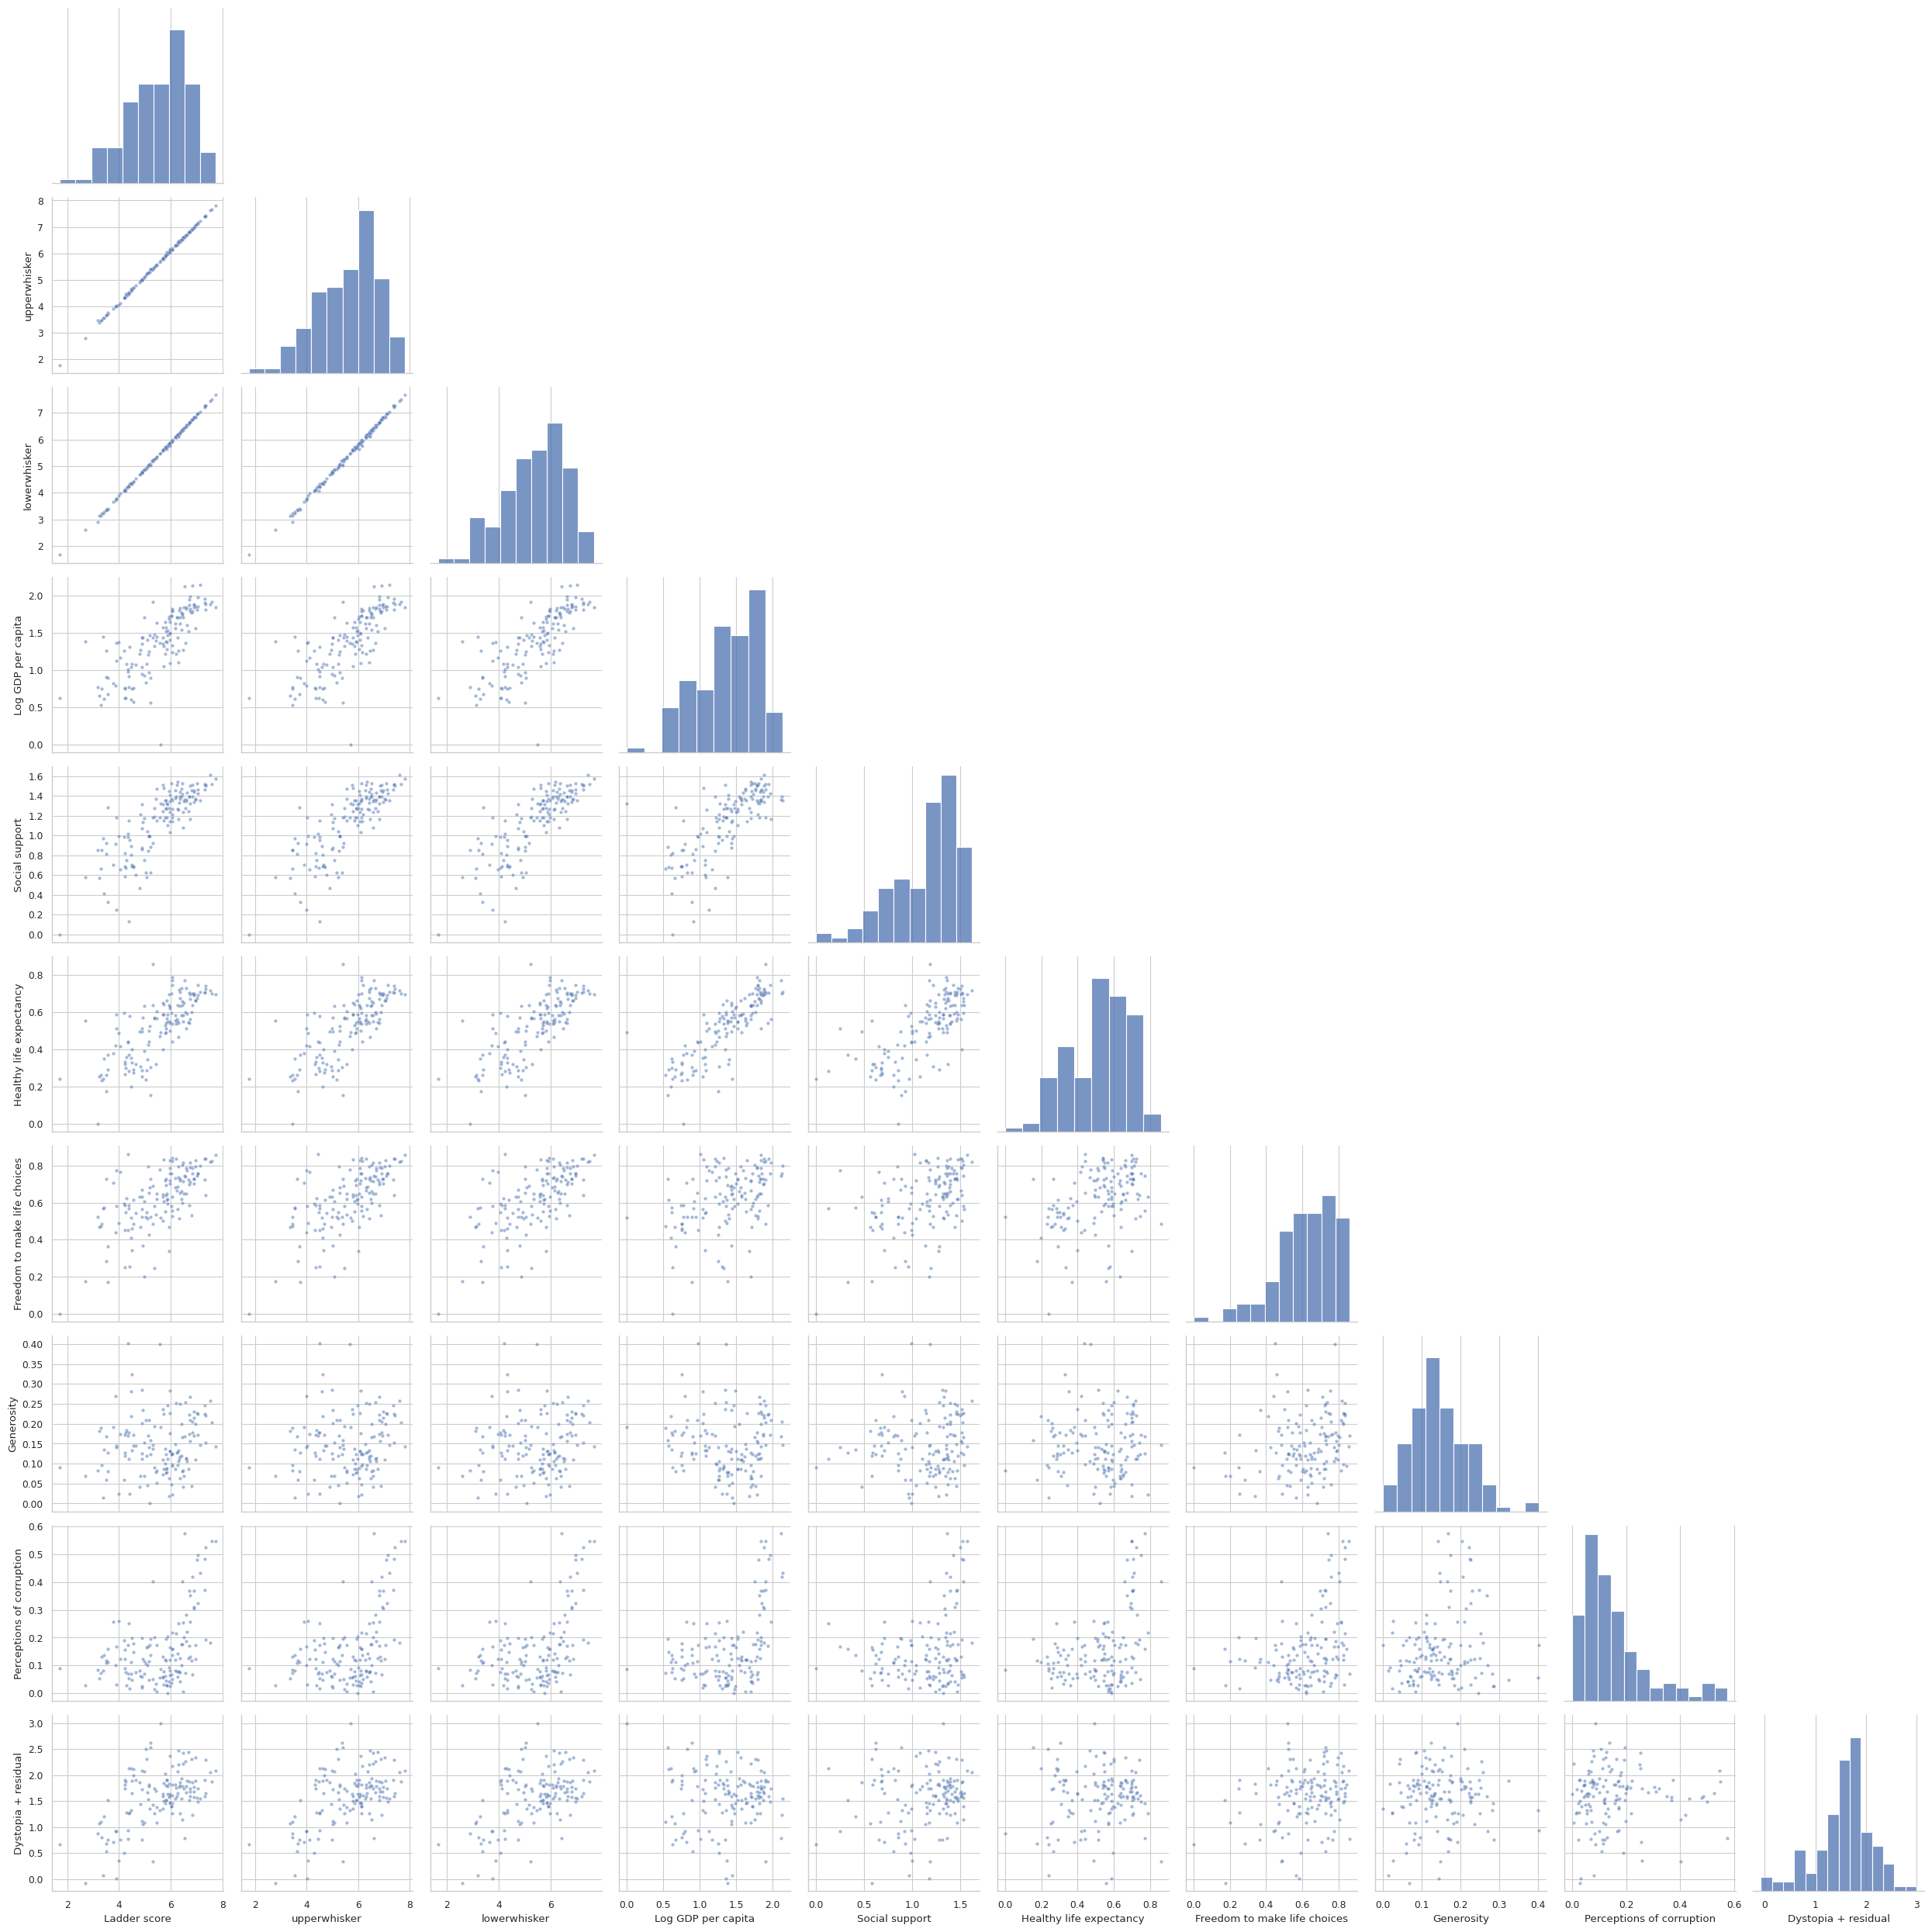

In [10]:
# I was a bit confused as to the best approach for creating a scatterplot was, so I asked GPT and sns was their recommendation!
cols = [
    "Ladder score", "upperwhisker", "lowerwhisker", "Log GDP per capita",
    "Social support", "Healthy life expectancy", "Freedom to make life choices",
    "Generosity", "Perceptions of corruption", "Dystopia + residual"
]

sns.set(style="whitegrid", context="paper")

sns.pairplot(df_transformed[cols], corner=True, plot_kws={'s': 10, 'alpha': 0.5})

plt.tight_layout()
plt.show()

**Figure 1**: This scatter plot displays Y vs. X for each pair of numerical columns from the World Happiness Report 2024 dataset, using the data as read. It was created with Seaborn’s pairplot (recommended by ChatGPT) and styled with a clean whitegrid background. The plot illustrates relationships between variables, making it simple to identify trends, such as the strong positive correlation between higher Ladder scores and increased Log GDP per capita.

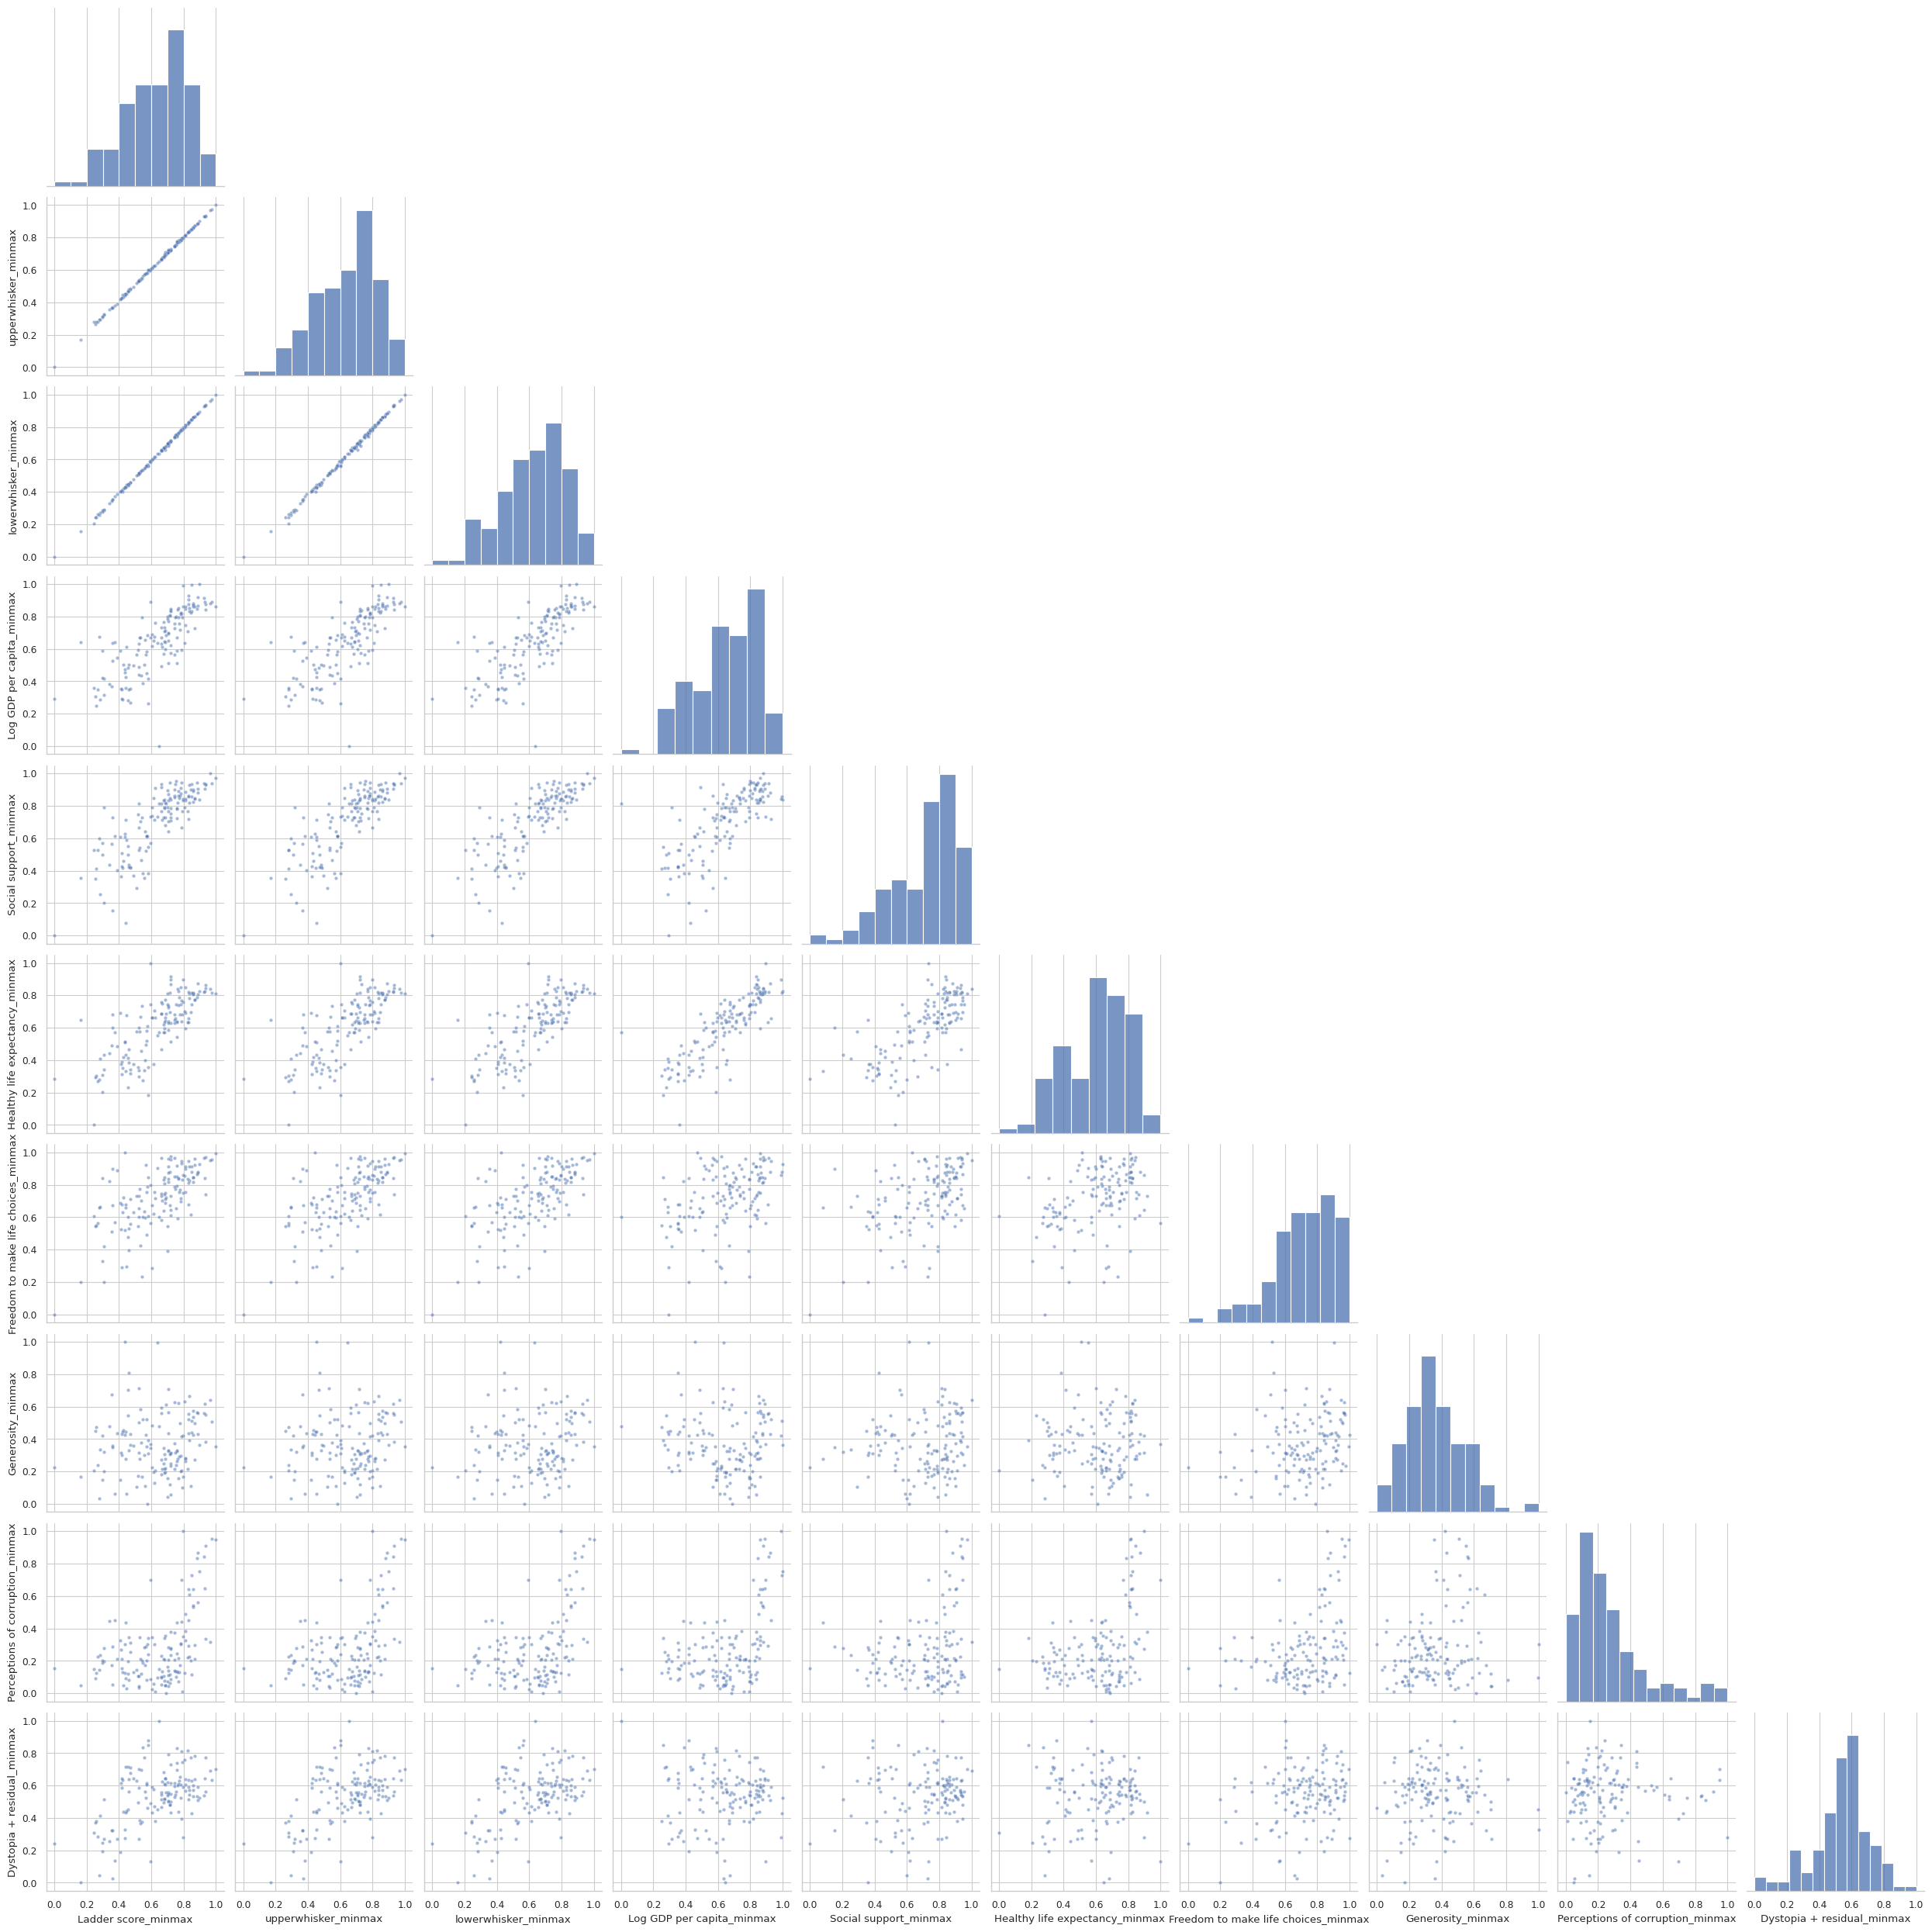

In [11]:
cols = [
    "Ladder score", "upperwhisker", "lowerwhisker", "Log GDP per capita",
    "Social support", "Healthy life expectancy", "Freedom to make life choices",
    "Generosity", "Perceptions of corruption", "Dystopia + residual"
]

minmax_cols = [f'{col}_minmax' for col in cols]

sns.set(style="whitegrid", context="paper")

sns.pairplot(df_transformed[minmax_cols], corner=True, plot_kws={'s': 10, 'alpha': 0.5})

plt.tight_layout()
plt.show()

**Figure 2:** The scatter plot above displays Y_minmax vs X_minmax for each pair of numerical columns from the World Happiness Report 2024 dataset, using min-max scaled values that transform the data to a standardized range of 0 to 1, unlike Figure 1, which used the unscaled original values. Although there is a difference with the use of scaling, it isn't really shown through the scatter plots. The relationships are pretty much unchanged and continue convey a positive correlation between higher Ladder scores and increased Log GDP per capita.

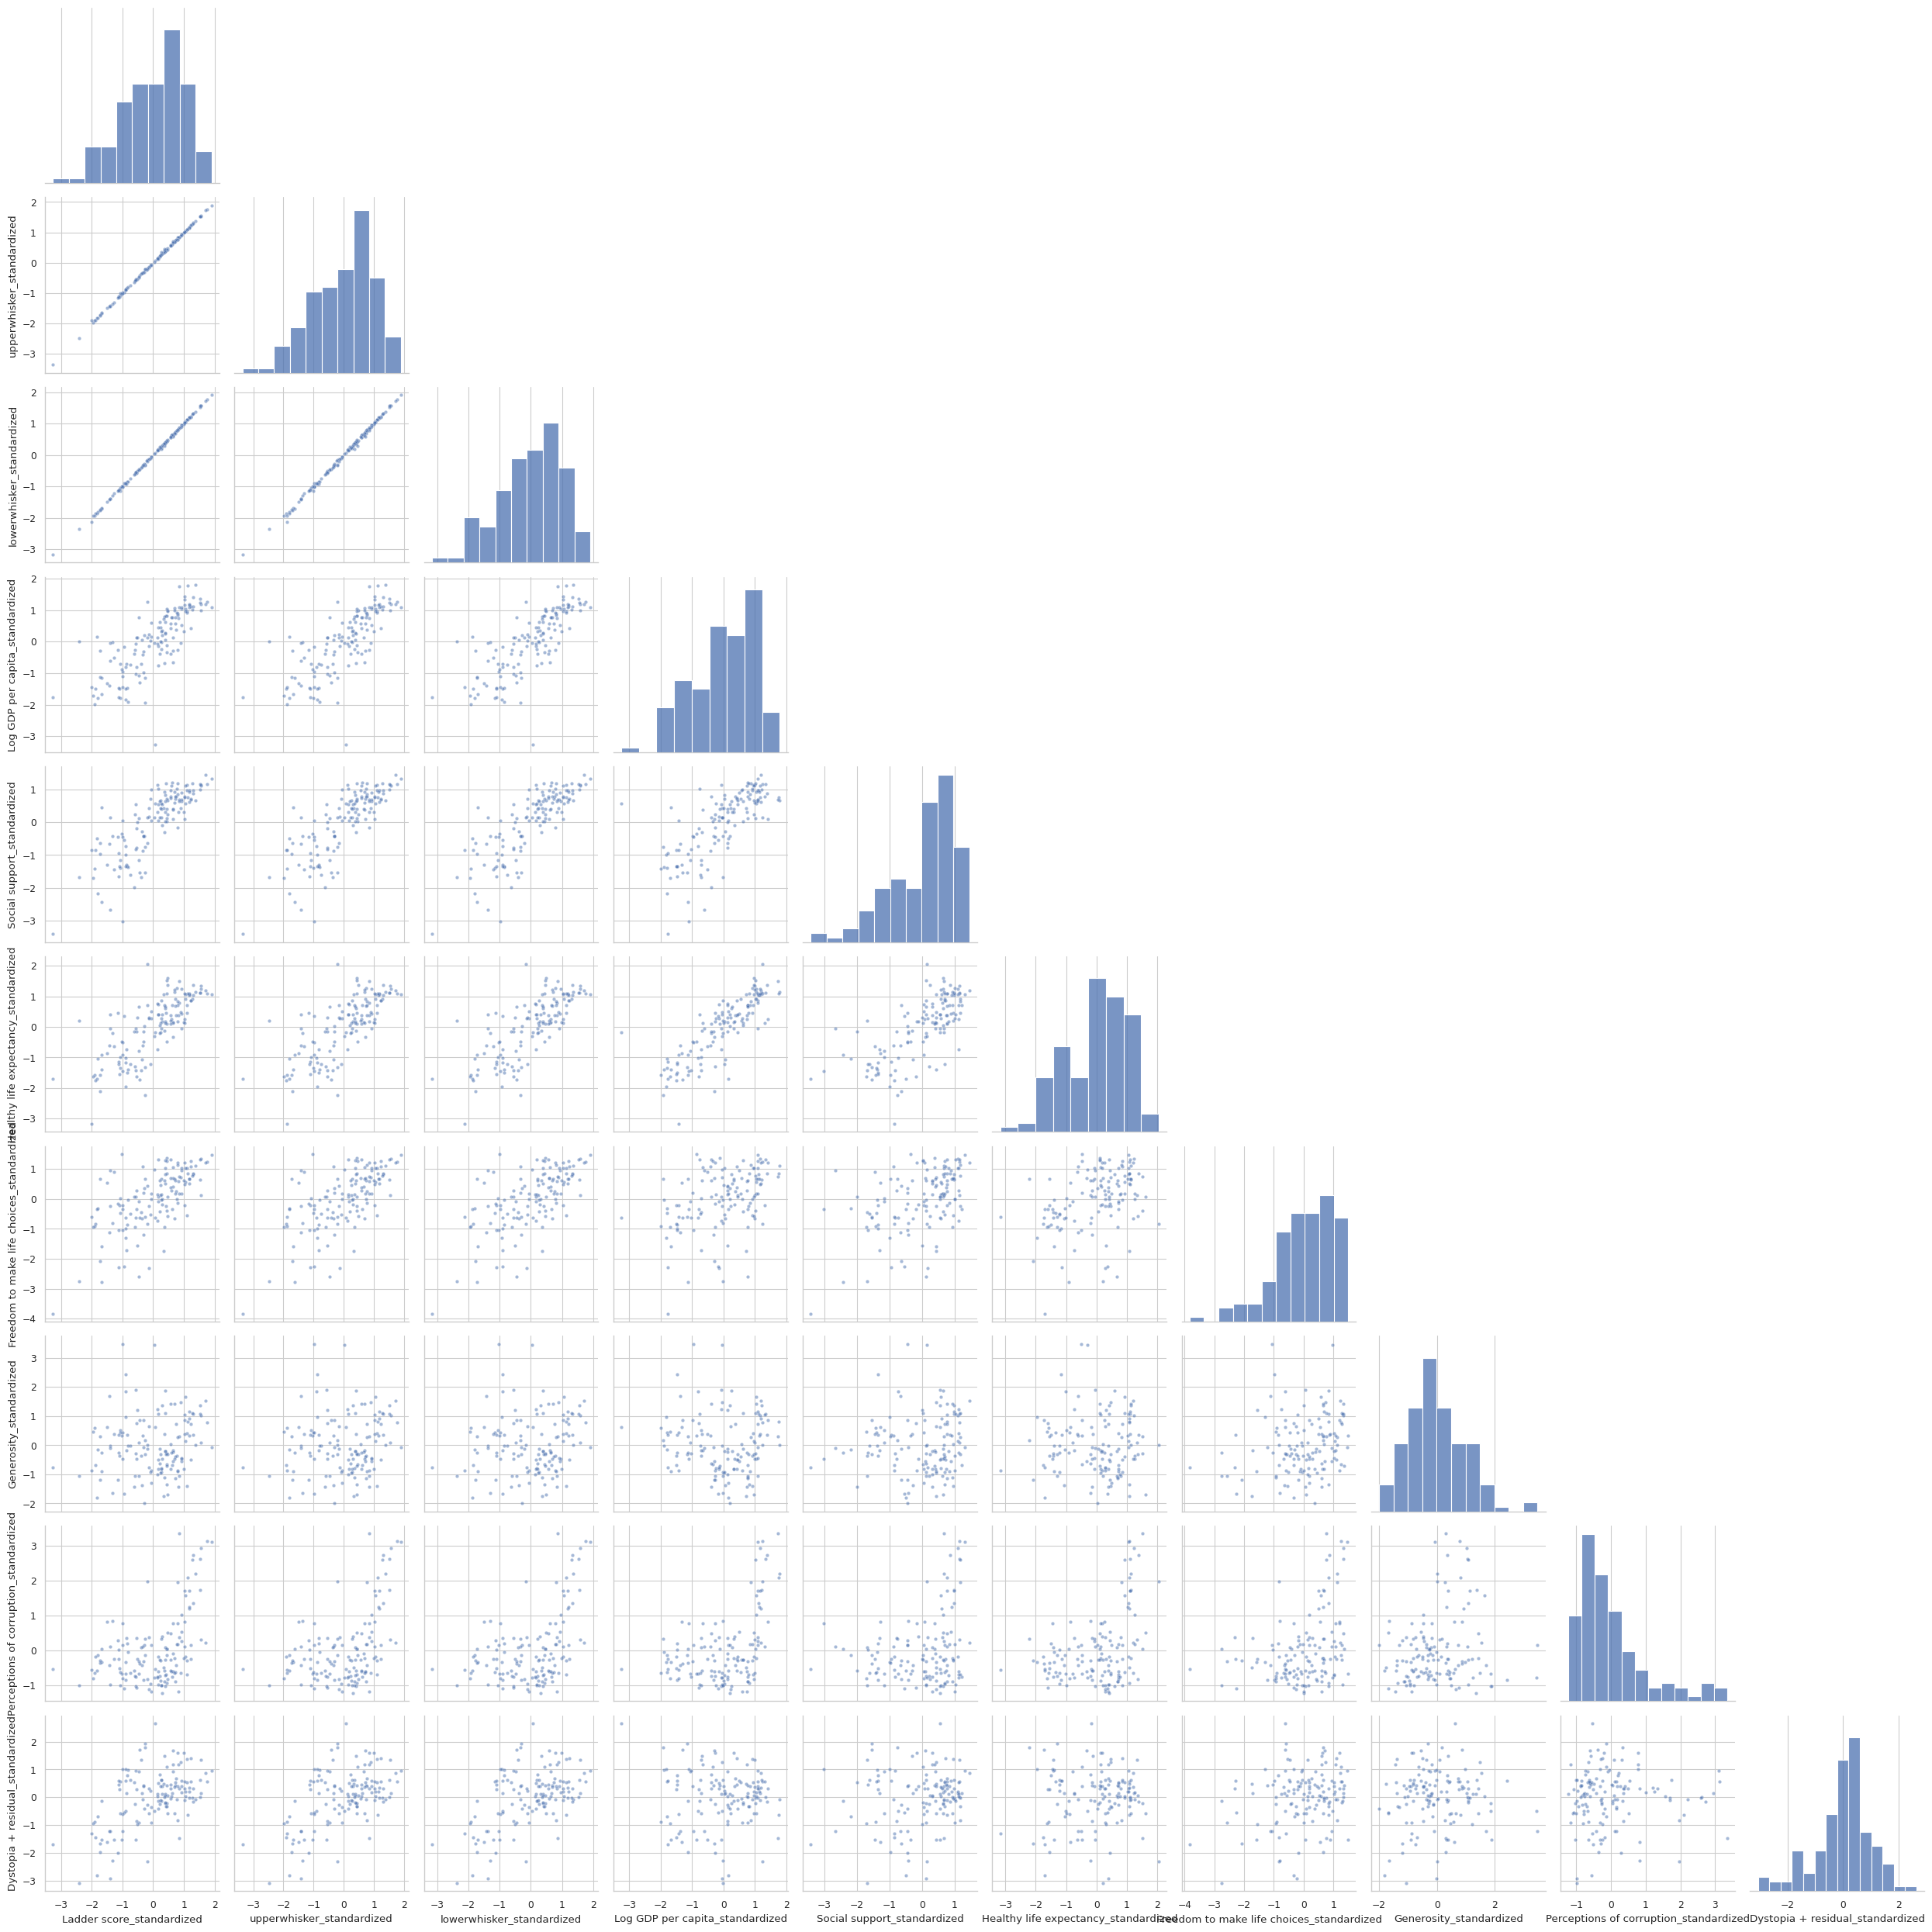

In [12]:
cols = [
    "Ladder score", "upperwhisker", "lowerwhisker", "Log GDP per capita",
    "Social support", "Healthy life expectancy", "Freedom to make life choices",
    "Generosity", "Perceptions of corruption", "Dystopia + residual"
]

std_cols = [f'{col}_standardized' for col in cols]

sns.set(style="whitegrid", context="paper")

sns.pairplot(df_transformed[std_cols], corner=True, plot_kws={'s': 10, 'alpha': 0.5})

plt.tight_layout()
plt.show()

**Figure 3**: Above is a scatter plot of Y_standardized and X_standardized. Again, there doesn't seem to be much of difference between this plot and Figure 1 and 2 but plotting the standardized values against one another makes it more noticeable how countries Finland stand out from the average.

## 5. Using KMeans clustering

In [13]:
df_transformed.columns

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual',
       'Ladder score_minmax', 'Ladder score_standardized',
       'upperwhisker_minmax', 'upperwhisker_standardized',
       'lowerwhisker_minmax', 'lowerwhisker_standardized',
       'Log GDP per capita_minmax', 'Log GDP per capita_standardized',
       'Social support_minmax', 'Social support_standardized',
       'Healthy life expectancy_minmax',
       'Healthy life expectancy_standardized',
       'Freedom to make life choices_minmax',
       'Freedom to make life choices_standardized', 'Generosity_minmax',
       'Generosity_standardized', 'Perceptions of corruption_minmax',
       'Perceptions of corruption_standardized', 'Dystopia + residual_minmax',
       'Dystopia + residual_standardized'],
      dtyp

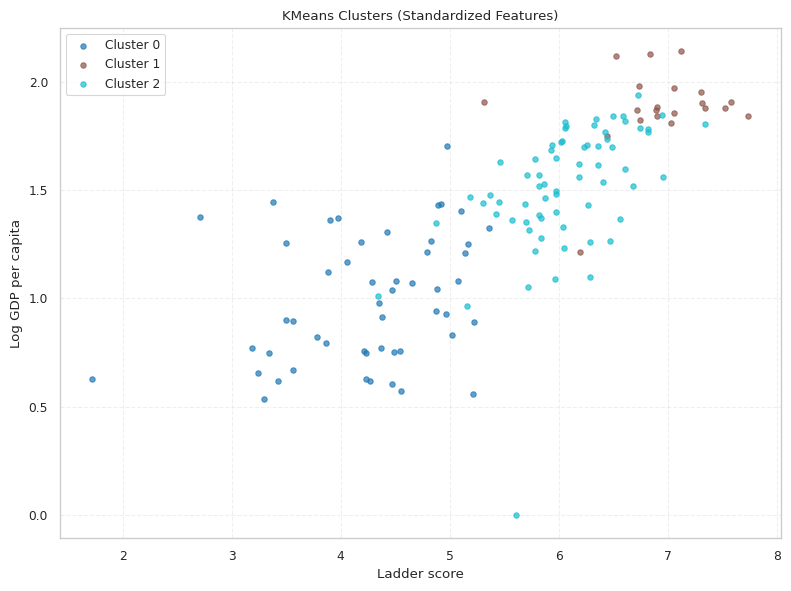

In [14]:
clustering_columns = [
    "Social support", "Healthy life expectancy", "Freedom to make life choices",
    "Perceptions of corruption", "Generosity", "Dystopia + residual"
]
scaled_columns = [f"{col}_standardized" for col in clustering_columns]

X = df_transformed[scaled_columns].dropna()
df_transformed = df_transformed.loc[X.index]

kmeans = KMeans(n_clusters=3, random_state=67, n_init=10)
df_transformed['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
colors = plt.cm.tab10(np.linspace(0, 1, 3))
for cluster_label, color in zip([0, 1, 2], colors):
    cluster_data = df_transformed[df_transformed['Cluster'] == cluster_label]
    plt.scatter(
        cluster_data['Ladder score'],
        cluster_data['Log GDP per capita'],
        s=15,
        color=color,
        alpha=0.7,
        label=f'Cluster {cluster_label}'
    )

plt.title('KMeans Clusters (Standardized Features)')
plt.xlabel('Ladder score')
plt.ylabel('Log GDP per capita')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

**Figure 4**: This scatter plot shows three clusters of countries from the happiness data, grouped using KMeans clustering on standardized features like Social support, Healthy life expectancy, Freedom, and more. Made with matplot, it plots ladder score against log GDP per capita with different colors for each cluster. Using the scatter plot makes it easy to point out which countries' citziens (such as Finland), have a higher-than-average happiness and overall wealth.

##6. Creating a scatter plot for the three clusters

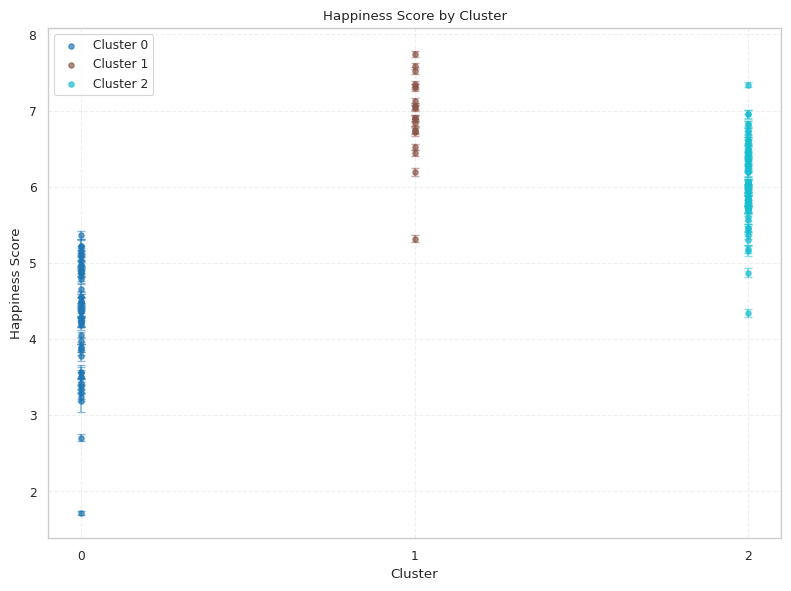

In [20]:
plot_columns = ['Cluster', 'Ladder score', 'upperwhisker', 'lowerwhisker']
df_transformed[plot_columns] = df_transformed[plot_columns].fillna(df_transformed[plot_columns].mean())
df_transformed['Ladder_score_SE'] = (df_transformed['upperwhisker'] - df_transformed['lowerwhisker']) / (2 * 1.96)

plt.figure(figsize=(8, 6))
colors = plt.cm.tab10(np.linspace(0, 1, 3))
for cluster_label, color in zip([0, 1, 2], colors):
    cluster_data = df_transformed[df_transformed['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Cluster'], cluster_data['Ladder score'], s=15, color=color, alpha=0.7)
    plt.errorbar(cluster_data['Cluster'], cluster_data['Ladder score'], yerr=cluster_data['Ladder_score_SE'], fmt='none', ecolor=color, capsize=3, alpha=0.5)

plt.title('Happiness Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Happiness Score')
plt.xticks([0, 1, 2])
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


**Figure 5**: This plot shows the average happiness scores for three clusters of countries identified using K-means clustering based on factors such as social support, health, freedom, and generosity. The clusters group together countries with similar happiness patterns, suggesting that certain combinations of these factors are associated with higher overall happiness. From the plot, countries in Cluster 0 appear to be the least happy, followed by Cluster 2 and then Cluster 1. Overall, the clustering seems effective, as the groups are distinct and show minimal overlap.

##7. Repeat for 2, 3, 4, 5 , 6, 7

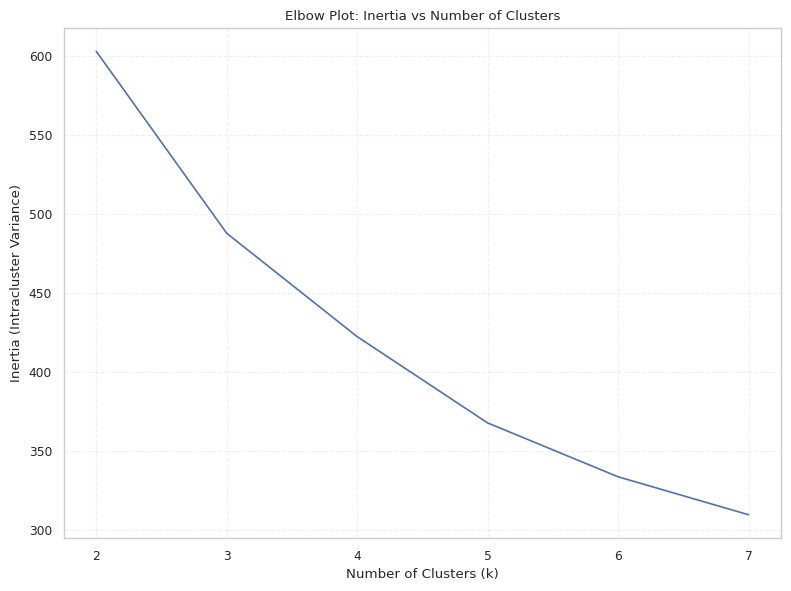

In [16]:
clustering_columns = [
    "Social support", "Healthy life expectancy", "Freedom to make life choices",
    "Perceptions of corruption", "Generosity", "Dystopia + residual"
]
scaled_columns = [f"{col}_standardized" for col in clustering_columns]

X = df_transformed[scaled_columns].dropna()
df_transformed = df_transformed.loc[X.index]

inertias = []
k_values = range(2, 8)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=67, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias)
plt.title('Elbow Plot: Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Intracluster Variance)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

**Figure 6**: Above is an elbow plot that shows the intracluster variance (inertia) for KMeans clustering with 2 to 7 clusters, but the curve lacks a sharp "elbow" bend. It's too smooth, making it challenging to identify a clear optimal number of clusters. There is a slight bend around k=3 or k=4 which suggests these might be reasonable choices, but the gradual decrease in inertia indicates that this plot alone doesn’t provide a robust selection of the correct number of clusters.